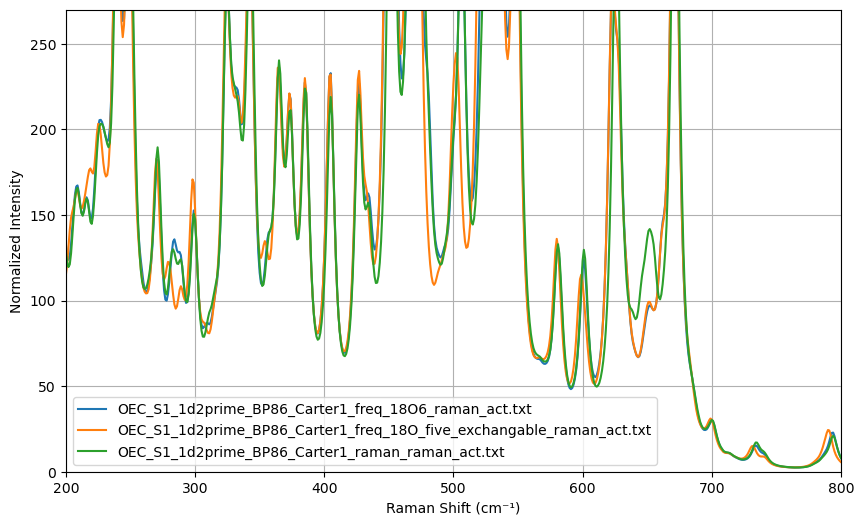

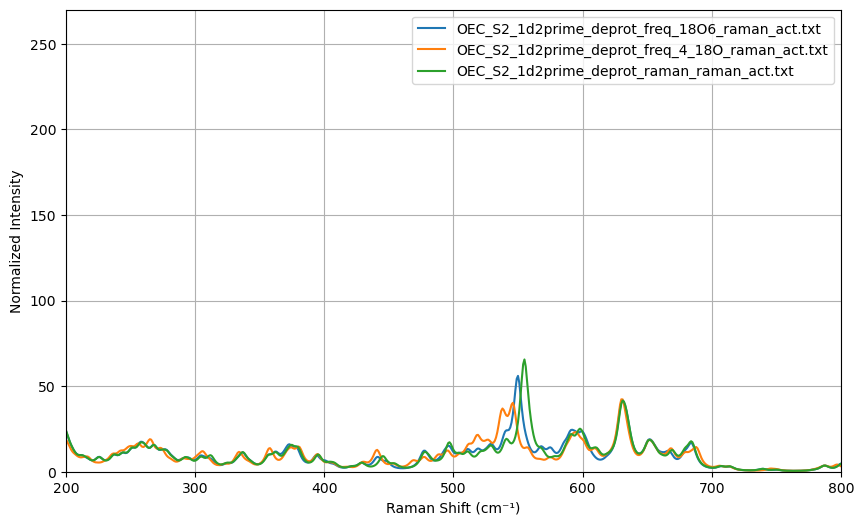

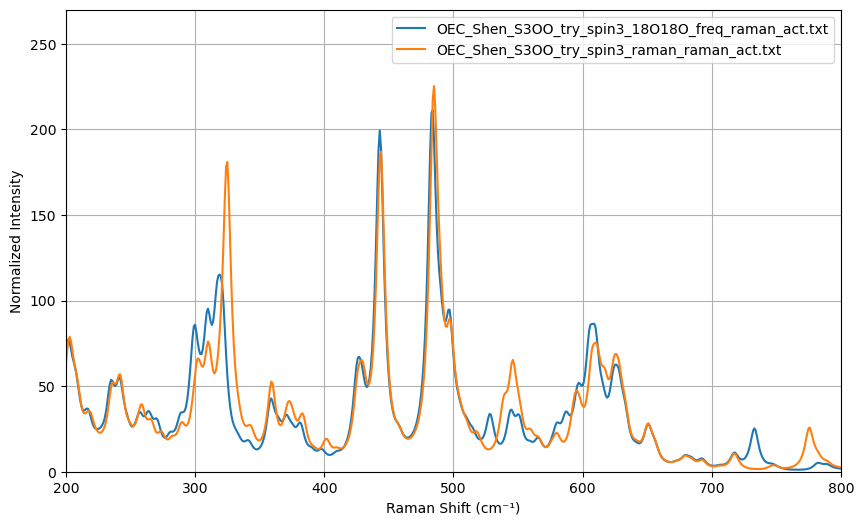

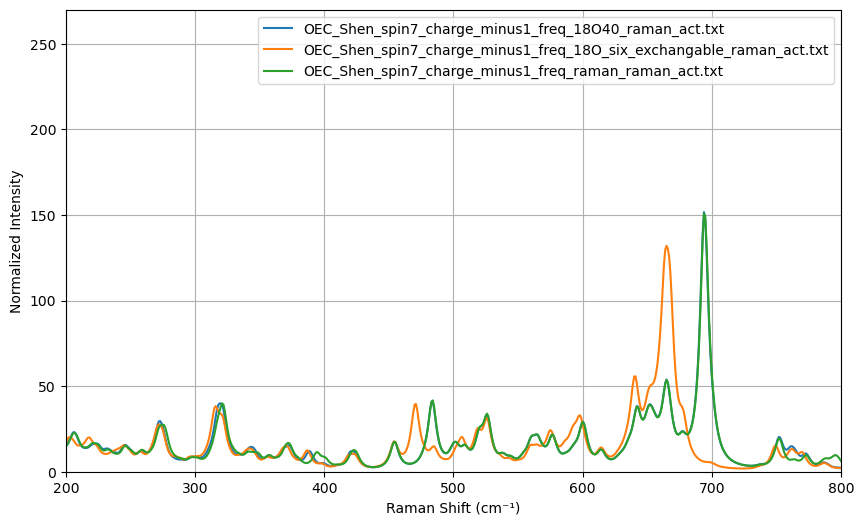

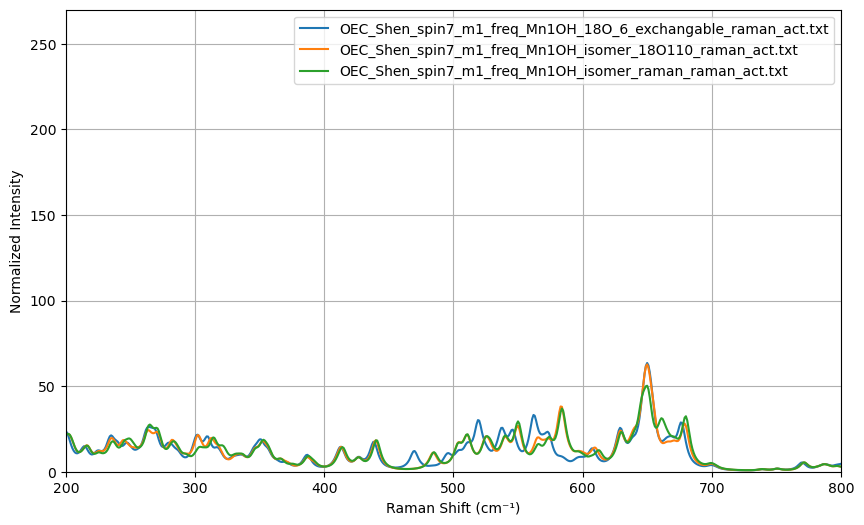

In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def subtract_data(file_path):
    """
    Extracts and normalizes spectral data from a file starting after '# Plot Curve (Harmonic)'.
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Locate line with "# Plot Curve (Harmonic)"
    skiprows = next(i + 1 for i, line in enumerate(lines) if "# Plot Curve (Harmonic)" in line)
    
    # Read the relevant data skipping rows before the plot section
    df = pd.read_csv(file_path, sep='\s+', skiprows=skiprows)  # Replace delim_whitespace=True with sep='\s+'
    df = df.drop(columns=['Y', 'DY/DX'], errors='ignore')  # Drop unnecessary columns if they exist
    df.columns = ['X', 'Y']  # Standardize column names

    frequencies = df['X'].values  # Frequency values
    intensities = df['Y'].values  # Intensity values
    
    # Normalize intensities between 0 and 1
    intensities_normalized = intensities
    #intensities_normalized = (intensities - np.min(intensities)) / (np.max(intensities) - np.min(intensities))
    
    return frequencies, intensities_normalized

def group_files_by_prefix(folder_18O, folder_16O):
    """
    Groups related files from two folders based on the first 10 characters of their names.
    """
    # List files in both directories
    files_18O = os.listdir(folder_18O)
    files_16O = os.listdir(folder_16O)

    # Group files by their first 20 characters
    file_groups = defaultdict(list)
    for file in files_18O:
        prefix = file[:20]  # First 20 characters
        file_groups[prefix].append(os.path.join(folder_18O, file))
    for file in files_16O:
        prefix = file[:20]  # First 20 characters
        file_groups[prefix].append(os.path.join(folder_16O, file))
    
    return file_groups

xlabeling = 'Raman Shift (cm⁻\u00b9)'
#xlabeling = 'wavenumber (cm⁻\u00b9)'

def plot_related_files(file_groups, spectra_type='Raman', xlabeling=xlabeling):
    """
    Plots all related files (grouped) on the same graph with normalized intensities.
    """
    for group_name, file_paths in file_groups.items():
        plt.figure(figsize=(10, 6))  # Create a new figure for each group
        for file_path in file_paths:
            try:
                frequencies, intensities_normalized = subtract_data(file_path)
                plt.plot(frequencies, intensities_normalized, label=os.path.basename(file_path))
            except Exception as e:
                print(f"Error processing file {file_path}: {e}")
                continue
        
        plt.xlim(200, 800)  # Set X-axis limits
        #plt.ylim(0, np.max(intensities_normalized)*1.3)  # Set Y-axis limits
        plt.ylim(0, 270)
        plt.xlabel(xlabeling)
        plt.ylabel('Normalized Intensity')
        #plt.title(f'Related {spectra_type} Spectra Group: {group_name}')
        plt.legend()
        plt.grid(True)
        plt.show()

def main():
    folder_18O = '18O_Raman'  # Replace with the path to your 18O_IR folder
    folder_16O = '16O_Raman'  # Replace with the path to your 16O_IR folder
    
    # Step 1: Group files by the first 10 characters of their names
    file_groups = group_files_by_prefix(folder_18O, folder_16O)
    
    # Step 2: Plot related files together
    plot_related_files(file_groups)

if __name__ == "__main__":
    main()
